## Used For ##

- Exploratory analysis
- Segmentation

*Pipeline:* 


   de-mean(?) -> PCA -> Scale (?) -> T-SNE -> Cluster

In [4]:
from sklearn.datasets import load_digits
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
X, y = load_digits(return_X_y= True) # underscore, I am not going to use this

In [6]:
X.shape, X.dtype # 2D version is useful for ML models

((1797, 64), dtype('float64'))

In [7]:
images = X.reshape(1797,8,8) # 3D array == tensor
#useful for plotting

In [8]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
a = images.flatten() # useful for serializing (writing big binary files)
a.shape

(115008,)

In [32]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

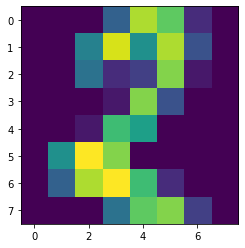

In [33]:
plt.imshow(images[50])

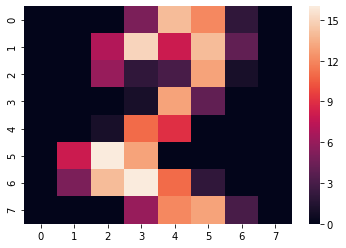

In [34]:
sns.heatmap(images[50])

### Preprocessing ###
 - **Curse of dimensionality** : Clustering does not work very well with 10+ features if you use Euclidean Distance
--> Reduce the number of features (PCA)

In [10]:
from sklearn.decomposition import PCA
import numpy as np

In [11]:
pca = PCA(n_components=20)
Xt = pca.fit_transform(X)
Xt.shape

(1797, 20)

<BarContainer object of 20 artists>

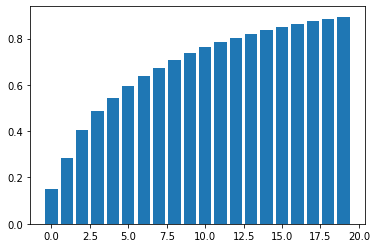

In [12]:
plt.bar(range(20),np.cumsum
        (pca.explained_variance_ratio_))

In [38]:
# We have almost everything (i.e y > .8)

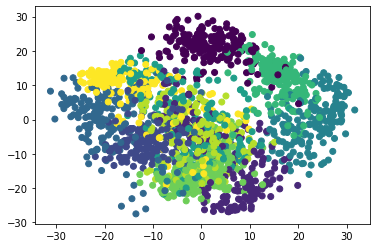

In [13]:
# plot 2 principal components to see if there is any separation
plt.scatter(Xt[:,0], Xt[:,1], c=y)

In [46]:
#Really important features are in first two so there is no need to plot 
# 16 vs 17 because they don't contain much info

When you do clustering: all features are really comparable - > scale the data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
Xtsc = MinMaxScaler().fit_transform(Xt)

### k-Means Clustering ###
* Not so great, sophisticated algorithm
* You have to decide the number of clusters before.
* Assumption that the clusters are spherical

In [49]:
from sklearn.cluster import KMeans

In [74]:
m = KMeans(n_clusters = 10, random_state=42, tol = 0.00000001) # naive guess because we have 10 digits
m.fit(Xtsc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=1e-08, verbose=0)

In [75]:
clusters = m.predict(Xtsc)
clusters[:10] # repetitive ones belong to the same cluster

array([8, 3, 3, 6, 0, 2, 1, 7, 2, 2], dtype=int32)

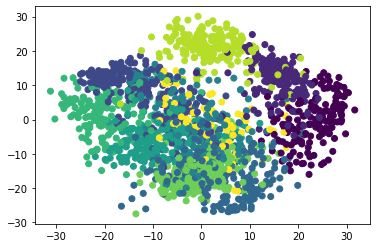

In [76]:
plt.scatter(Xt[:,0], Xt[:,1], c=clusters)

In [77]:
cluster3 = images[clusters == 3]

In [85]:
cluster6 = images[clusters == 6]

In [87]:
cluster6.shape

(164, 8, 8)

In [88]:
cluster3.shape

(229, 8, 8)

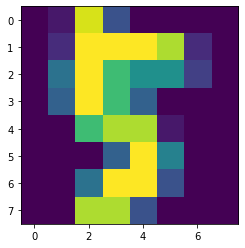

In [97]:
plt.imshow(cluster3[6])

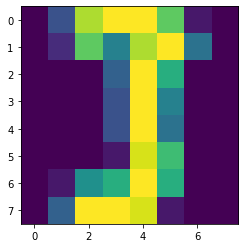

In [93]:
plt.imshow(cluster6[10])

In [95]:
clusters.shape, y.shape

((1797,), (1797,))

In [96]:
df = pd.DataFrame({'y': y, 'cluster': clusters})
df.head(10)

,y,cluster
0,0,8
1,1,3
2,2,3
3,3,6
4,4,0
5,5,2
6,6,1
7,7,7
8,8,2
9,9,2


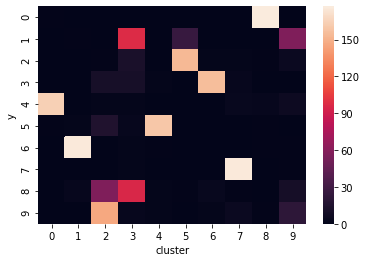

In [103]:
count = df.groupby('y')['cluster'].value_counts().unstack().fillna(0)
sns.heatmap(count)

### t-SNE ###
* does a dimensionality reduction for less than 50 features to 2
* good for visualizing the data
* slower
* non - linear transform

In [104]:
from sklearn.manifold import TSNE

In [105]:
Xtsne = TSNE().fit_transform(Xtsc)
Xtsne.shape

(1797, 2)

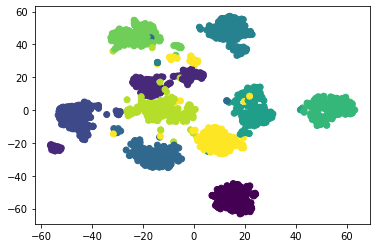

In [106]:
plt.scatter(Xtsne[:,0], Xtsne[:,1], c=y)

In [107]:
m = KMeans(n_clusters = 10, random_state=42) # naive guess because we have 10 digits
m.fit(Xtsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [111]:
clusters_sne = m.predict(Xtsne)
clusters_sne[:10] # repetitive ones belong to the same cluster

array([2, 8, 1, 7, 0, 9, 3, 5, 1, 9], dtype=int32)

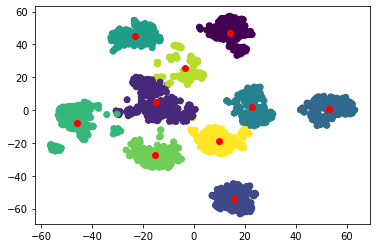

In [119]:
plt.scatter(Xtsne[:,0], Xtsne[:,1], c=clusters_sne)
plt.plot(m.cluster_centers_[:,0], m.cluster_centers_[:,1], 'ro')

In [113]:
clustersne3 = images[clusters_sne == 3]

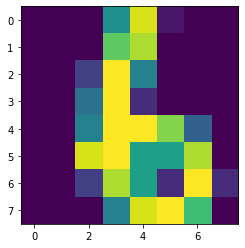

In [116]:
plt.imshow(clustersne3[1])

In [117]:
df_sne = pd.DataFrame({'y': y, 'cluster': clusters_sne})
df.head(10)

,y,cluster
0,0,8
1,1,3
2,2,3
3,3,6
4,4,0
5,5,2
6,6,1
7,7,7
8,8,2
9,9,2


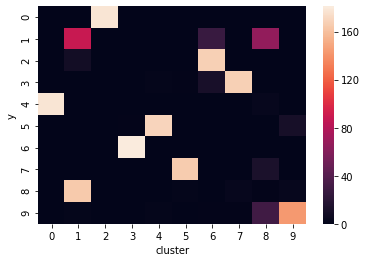

In [118]:
count = df_sne.groupby('y')['cluster'].value_counts().unstack().fillna(0)
sns.heatmap(count)

## Challenge : DBSCAN ##
Finds core samples of high density and expands clusters from them.



In [1]:
from sklearn.cluster import DBSCAN

In [2]:
# I will take the PCA transformed and scaled data as X for this, which is Xtsc

In [113]:
db = DBSCAN(eps = .5, min_samples=3).fit(Xtsc)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [114]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [115]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 84


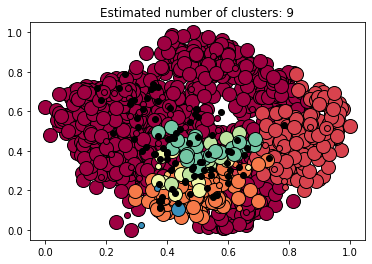

In [116]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Xtsc[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Xtsc[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()